Reference - https://medium.com/tensorist/making-e-commerce-business-decisions-using-scikit-learn-2dd1d76ab675

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
customers = pd.read_csv('../../dateset/ecommerce_customers.csv')

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


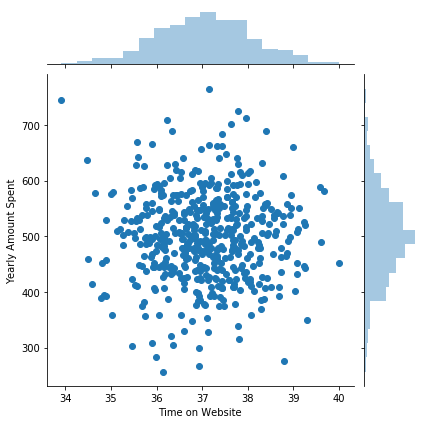

In [8]:
sns.jointplot('Time on Website', 'Yearly Amount Spent', data=customers)

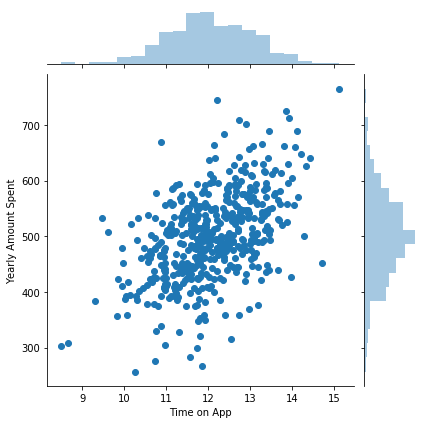

In [9]:
sns.jointplot('Time on App', 'Yearly Amount Spent', data=customers)

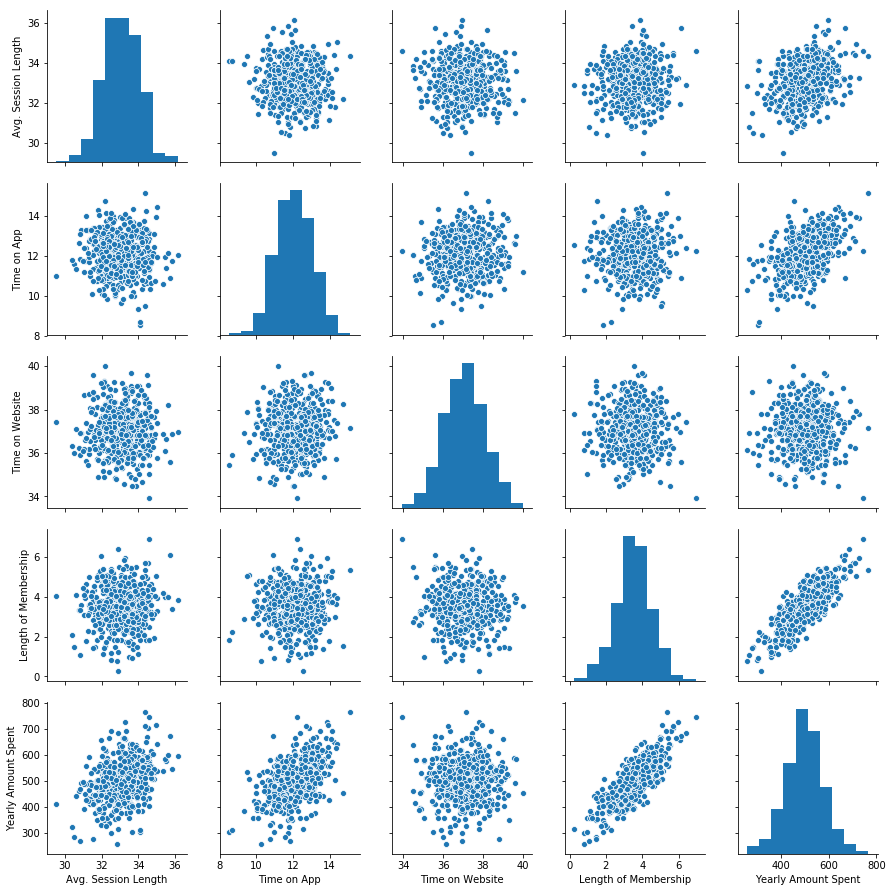

In [10]:
sns.pairplot(customers)

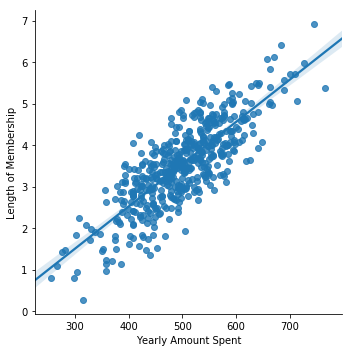

In [11]:
sns.lmplot('Yearly Amount Spent', 'Length of Membership', data=customers)

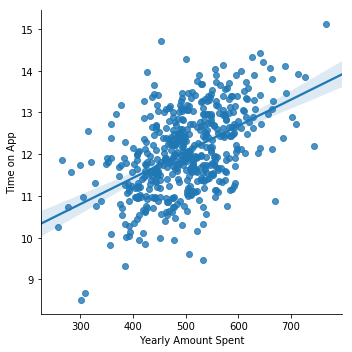

In [12]:
sns.lmplot('Yearly Amount Spent', 'Time on App', data=customers)

In [13]:
label=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
X = customers[label] 

y = customers[['Yearly Amount Spent']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [17]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

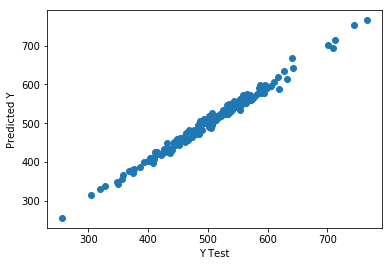

In [18]:
plt.scatter(y_test, predictions)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [19]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predictions)

mse = metrics.mean_squared_error(y_test, predictions)

rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [20]:
print ("MAE:",mae)
print ("MSE:",mse)
print ("RMSE:",rmse)

MAE: 7.228148653430835
MSE: 79.81305165097443
RMSE: 8.933815066978633


Text(0, 0.5, 'Residual')

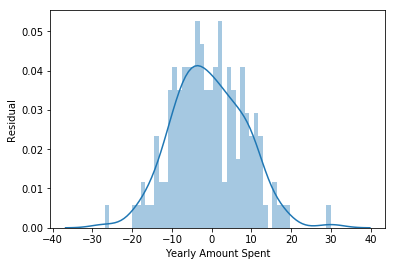

In [21]:
sns.distplot(y_test-predictions, bins=50, kde=True)

plt.xlabel('Yearly Amount Spent')
plt.ylabel('Residual')

In [22]:
coeffs = pd.DataFrame(data=lm.coef_.transpose(), index=X.columns, columns=['Coefficient'])
coeffs

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [23]:
def plot_bar_x(x):
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, x)
    plt.xlabel('Coefficient', fontsize=10)
    plt.ylabel('Label', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Plot of Coefficients related to each Label')
    plt.show()

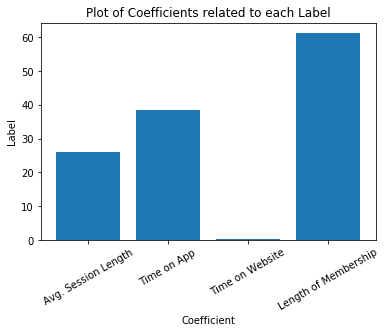

In [24]:
plot_bar_x(coeffs.Coefficient)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9890046246741234

In [26]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,
                            n_estimators=100)

In [27]:
regr.fit(X_train, y_train)

c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
print(regr.feature_importances_)

[0.00235048 0.11914482 0.         0.8785047 ]


In [29]:
pred_RF=regr.predict(X_test)

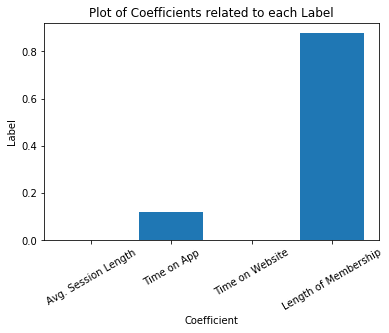

In [30]:
plot_bar_x(regr.feature_importances_)

Text(0, 0.5, 'Predicted Y')

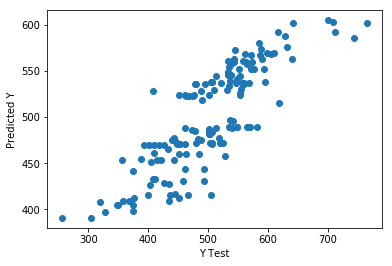

In [31]:
plt.scatter(y_test, pred_RF)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
mae = metrics.mean_absolute_error(y_test, pred_RF)

mse = metrics.mean_squared_error(y_test, pred_RF)

rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_RF))

In [33]:
print ("MAE:",mae)
print ("MSE:",mse)
print ("RMSE:",rmse)

MAE: 38.78840114066239
MSE: 2420.34755101313
RMSE: 49.19702786767845


In [34]:
r2_score(y_test, pred_RF)

0.6665629343577333

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, encoded)

c:\users\saptarshi\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [37]:
pred_LR=clf.predict(X_test)

Text(0, 0.5, 'Predicted Y')

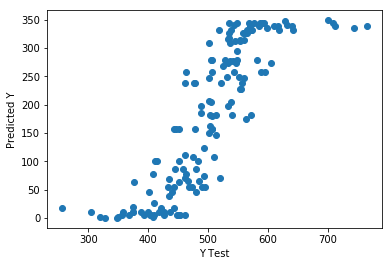

In [38]:
plt.scatter(y_test, pred_LR)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [39]:
mae = metrics.mean_absolute_error(y_test, pred_LR)

mse = metrics.mean_squared_error(y_test, pred_LR)

rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_LR))

In [40]:
print ("MAE:",mae)
print ("MSE:",mse)
print ("RMSE:",rmse)

MAE: 321.99285571558516
MSE: 108683.43668980482
RMSE: 329.6717104784771


In [41]:
r2_score(y_test, pred_LR)

-13.972678695915516

In [56]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
AxesSubplot(0.125,0.125;0.775x0.755)


KeyError: "None of [['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']] are in the [index]"

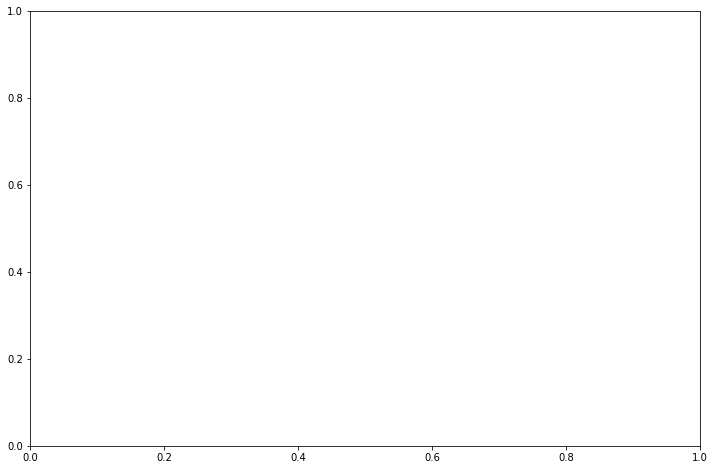

In [67]:
l1=list(customers.columns)
print (l1)
figure, ax = plt.subplots(figsize=(12,8))
print (ax)
print ("corr----",customers.loc[l1].corr())
f = customers.loc[:, l1].corr()
print (f)
g = sns.heatmap(f, annot=True, ax=ax)
g.set_yticklabels(labels=l1[:], rotation=0)
g.set_xticklabels(labels=l1[:], rotation=90)

In [60]:
print (label)

['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
